<img src="../../../imgs/CampQMIND_banner.png">

# Linear Regression

This notebook is intended as a short introduction to linear regression. Linear regression is implemented in both scikit-learn and statsmodels.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Implementation</a></span><ul class="toc-item"><li><span><a href="#Normal-Equation" data-toc-modified-id="Normal-Equation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Normal Equation</a></span></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Gradient Descent</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Coefficient-of-Determination-(R^2)" data-toc-modified-id="Coefficient-of-Determination-(R^2)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Coefficient of Determination (R^2)</a></span></li><li><span><a href="#Root-Mean-Squared-Error-(RMSE)" data-toc-modified-id="Root-Mean-Squared-Error-(RMSE)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Root Mean Squared Error (RMSE)</a></span><ul class="toc-item"><li><span><a href="#What-is-it?" data-toc-modified-id="What-is-it?-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>What is it?</a></span></li><li><span><a href="#When-is-it-good-for?" data-toc-modified-id="When-is-it-good-for?-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>When is it good for?</a></span></li></ul></li><li><span><a href="#Mean-Absolute-Error-(MAE)" data-toc-modified-id="Mean-Absolute-Error-(MAE)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Mean Absolute Error (MAE)</a></span><ul class="toc-item"><li><span><a href="#What-is-it?" data-toc-modified-id="What-is-it?-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>What is it?</a></span></li><li><span><a href="#When-is-it-good-for?" data-toc-modified-id="When-is-it-good-for?-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>When is it good for?</a></span></li></ul></li></ul></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Libraries</a></span><ul class="toc-item"><li><span><a href="#Sklearn" data-toc-modified-id="Sklearn-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Sklearn</a></span></li><li><span><a href="#Statsmodels" data-toc-modified-id="Statsmodels-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Statsmodels</a></span></li></ul></li><li><span><a href="#Resources" data-toc-modified-id="Resources-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Resources</a></span></li></ul></div>

In [1]:
from IPython.display import IFrame
IFrame('https://www.youtube.com/embed/CtKeHnfK5uA',560,315)

# Implementation

The estimator is $h_{\theta} = \theta_0x_0+\theta_1x_1+\theta_2x_2+...++\theta_nx_n$

The cost function(the function we want to optimize) is 
$\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x) - y)$

In matrix form the equation becomes $X\theta = y$

Where X is an observation(m) by feature matrix(n)

$\theta$ is a n+1 column vector and y is a size m column vector.

We want to solve for the set of weights ($\theta$).

## Normal Equation

The analytical solution to the above formulation is known as the normal equation.

Assuming $X^TX$ exists, $\theta = (X^TX)^{-1}X^Ty$

This formulation of linear regression can be found in numpy.linalg package under the name "lstsq".

## Gradient Descent

The m becomes large especially for m > 10^4, the above equation becomes difficult to solve.

An alternate formulation involves iteratively changing the weight vector $\theta$ with respect to the cost function. This approach is used most frequently with deep learning methods.

You can find a brief explanation of gradient descent [here.](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)

# Evaluation

## Coefficient of Determination (R^2)

<p>Sometimes, it is helpful to think about how well the model is doing than just predicting the mean.</p>
<p>For the general use case, we will use this explain how much of the variance in the dependent variable is captured by the independent variables.</p>
<p> * The equations * </p>
$SS_{total} = \sum(y_{i} - \bar{y})^2$  , $SS_{residual} = \sum(y_{i} - \hat{y})$
where $y_{i}$ is the dependent variable, $\hat{y}$ is the prediction and $\bar{y}$ is the mean of $y$.

<p> We define $R^2 = 1 - \frac{SS_{residual}}{SS_{total}}$ </p>

$R^2$ close to one means the model performs better than the horizontal line while an $R^2$ of zero means the model performs worse than the horizontal line.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tips = sns.load_dataset("tips")
X_train, X_test, y_train, y_test = train_test_split(tips.total_bill.values.reshape(-1, 1),tips.tip.values)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

R-squared is 0.54


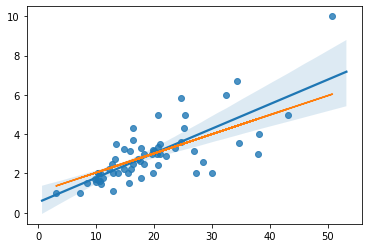

In [3]:
sns.regplot(X_test,y_test)
plt.plot(X_test,predictions)
from sklearn.metrics import r2_score
print("R-squared is",r2_score(y_test,predictions).round(2))

# As you can see a low r^2 corresponds to a poor explanation of the variation of the underlying system

## Root Mean Squared Error (RMSE)

### What is it?

$$\text{RMSE} = \sqrt{\sum_{i=1}^{N}\frac{(\hat{y_i} - y_i)^2}{N}}$$

### When is it good for?

- It is in the same scale as the dependent variable.
- It places higher weight on bigger errors. This means if you make a far off prediction, the error^2 will be very high.
- For that reason it is not robust to outliers.
- It's advisible to you this metric when outliers are in fact outliers.

## Mean Absolute Error (MAE)

### What is it?

$$\text{MAE} = \sum_{i=1}^{N}\frac{|\hat{y_i} - y_i|}{N}$$

### When is it good for?

- It is in the same scale as the dependent variable.
- Unlike RMSE it does not place high weight on far off predictions.
- For this reason it is more robust to outliers.

# Libraries

## Sklearn

In [4]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [5]:
features = load_boston(return_X_y=False)['feature_names']
X,y = load_boston(return_X_y=True)
df = pd.DataFrame(X,columns=features)
df["target"] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [7]:
lr = LinearRegression()
lr.fit(X_train,y_train)
preds = lr.predict(X_test)
print("R-squared is",r2_score(y_test,preds).round(3))
print("Root mean squared error is",np.sqrt(mean_squared_error(y_test,preds)).round(3))

R-squared is 0.635
Root mean squared error is 5.457


In [8]:
print("Coefficients are",lr.coef_)
print("Intercept is",lr.intercept_)

Coefficients are [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
Intercept is 36.933255457118975


## Statsmodels

In [9]:
import statsmodels.api as sm


In [10]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.params

array([-0.11631155,  0.04582511, -0.03406271,  2.54347348, -0.07737062,
        5.97510447, -0.01528812, -0.92550879,  0.1045704 , -0.00864844,
       -0.4486441 ,  0.01412772, -0.38141142])

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              738.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                   2.27e-253
Time:                        22:52:19   Log-Likelihood:                         -1122.8
No. Observations:                 379   AIC:                                      2272.
Df Residuals:                     366   BIC:                                      2323.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1163      0.040     -2.944      0.003      -0.194      -0.039
x2             0.0458      0.016      2.895      0.004       0.015       0.077
x3            -0.0341      0.070     -0.485      0.628      -0.172       0.104
x4             2.5435      1.014      2.508      0.013       0.549       4.538
x5            -0.0774      3.812     -0.020      0.984      -7.573       7.419
x6             5.9751      0.346     17.252      0.000       5.294       6.656
x7            -0.0153      0.016     -0.975      0.330      -0.046       0.016
x8            -0.9255      0.222     -4.178      0.000      -1.361      -0.490
x9             0.1046      0.074      1.423      0.156      -0.040       0.249
x10           -0.0086      0.004     -2.027      0.043      -0.017      -0.000
x11           -0.4486      0.126     -3.566      0.000      -0.696      -0.201
x12            0.0141      0.003      4.608      0.000       0.008       0.020
x13           -0.3814      0.058     -6.615      0.000      -0.495      -0.268
==============================================================================
Omnibus:                      179.629   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1538.969
Skew:                           1.798   Prob(JB):                         0.00
Kurtosis:                      12.194   Cond. No.                     8.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
preds = results.predict(X_test)
print("R-squared is",r2_score(y_test,preds).round(3))
print("Root mean squared error is",np.sqrt(mean_squared_error(y_test,preds)).round(3))

R-squared is 0.599
Root mean squared error is 5.722


# Resources

- https://www.coursera.org/learn/machine-learning

- https://realpython.com/linear-regression-in-python/

- A short introduction to linear regression. http://onlinestatbook.com/2/regression/intro.html